# Anomaly Detection

Just a notebook for me to play around with anomaly detection

First up, isolation forest. The idea is to recursively separate the points, and the anomalies are those that can beseparated early in the process.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import random

In [3]:
def partition(v, f=lambda x: x):
    assert v
    fv = [f(x) for x in v]
    #split = sum(fv) / len(v)   # mean
    split = (max(fv) + min(fv)) / 2.0   # middle
    left = [a for a in v if f(a) < split]
    equ = [b for b in v if f(b) == split]
    equ0 = equ[::2]
    equ1 = equ[1::2]
    right = [c for c in v if f(c) > split]
    if len(left) < len(right):
        return (left + equ0, equ1 + right)
    return (left + equ1, equ0 + right)        

In [4]:
def itree(p, d=0):
    assert p
    if len(p) == 1:
        return [(p[0], d)]
    hs = partition(p, lambda x: x[0])
    vs = partition(p, lambda x: x[1])
    if abs(len(hs[0]) - len(hs[1])) < abs(len(vs[0]) - len(vs[1])):
        # horizontal split is better
        return itree(hs[0], d + 1) + itree(hs[1], d + 1)
    return itree(vs[0], d + 1) + itree(vs[1], d + 1)

In [5]:
x = [random.randint(40,60) for i in range(50)] + [3] + [random.randint(40,60) for i in range(50)]

In [6]:
y = [random.randint(40,60) for i in range(50)] + [90] + [random.randint(40,60) for i in range(50)]

In [7]:
pts = list(zip(x,y))

In [8]:
tree = itree(pts)

In [9]:
x = [a[0][0] for a in tree]

In [10]:
y = [a[0][1] for a in tree]

In [11]:
col = [a[1] for a in tree]

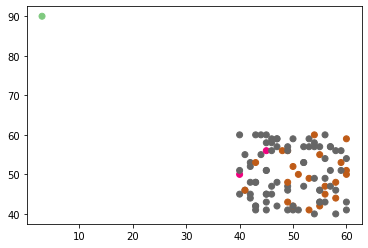

In [12]:
plt.scatter(x, y, c=col, cmap="Accent")

In [13]:
import collections

In [14]:
collections.Counter(col)

Counter({8: 76, 7: 22, 6: 2, 1: 1})